In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Boston Data set:
from sklearn.datasets import load_boston

(a) Use the Boston data set from Homework 0 to create a
          training set. Recall the 'label' of each point in this data set is
          the target value, namely the median value of owner occupied
          homes. Let $M$ be the average value of the target value over
          the entire data set.  Compute $M$.

In [5]:
boston = load_boston()
boston.keys()
boston.feature_names
boston.DESCR
pandadata = pd.read_csv('/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/boston_house_prices.csv', skiprows=1 )
prices = pandadata['MEDV']
M = prices.sum() / prices.size
M

22.532806324110677

(b) The goal is to build a decision tree that, based
          on the other features in the set, predicts whether the
          target value will be greater than or equal to $M$ (or less
          than $M$).  So, this is a classification problem.   Using
          any tree-based methods in the scikit-learn library, build a
          decision tree and report its error using 10-fold cross
          accuracy.  For full credit your cross-validated accuracy
          must be at least $70\%$.  Vary the depth of your
          decision tree and plot its cross-validated accuracy (as a
          function of the depth). Please use depth = $1, 2, \dots, 10$.

In [0]:
# Prepare data for calculations
pandadata
X = pandadata[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
Y = pandadata['MEDV']
is_greater = Y.apply(lambda val: val > M) # Is necessary to transform continous target values to discreet

def average(lst): 
    return sum(lst) / len(lst)

#cl_continuous = svm.SVR(gamma=0.001, C=100.)     # Not being used!
#cl_continuous.fit(X, Y)

Tree depth 1   Average of cross-validation scores = 0.796902
Tree depth 2   Average of cross-validation scores = 0.826196
Tree depth 3   Average of cross-validation scores = 0.816549
Tree depth 4   Average of cross-validation scores = 0.775059
Tree depth 5   Average of cross-validation scores = 0.781020
Tree depth 6   Average of cross-validation scores = 0.771255
Tree depth 7   Average of cross-validation scores = 0.755569
Tree depth 8   Average of cross-validation scores = 0.733804
Tree depth 9   Average of cross-validation scores = 0.741647
Tree depth 10   Average of cross-validation scores = 0.735843


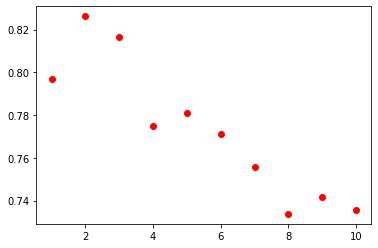

In [67]:
# Vary depth of tree from 1 - 10 and plot cross-validated accuracy using 10-fold cross accuracy
for depth in range(1, 11):
    cltree = tree.DecisionTreeClassifier(criterion="gini", max_depth=depth)
    cltree = cltree.fit(X, is_greater)
    cross_validation_scores = cross_val_score(cltree, X, is_greater, cv=10)    # returns array with result of each run of cross-validation
    cross_scores_average = average(cross_validation_scores)                    # calculate the average result from cross-validation array
    print('Tree depth %d   Average of cross-validation scores = %f' 
          % (depth, cross_scores_average))     
    plt.plot(depth, cross_scores_average.item(), 'ro', scalex=True, scaley=True)

plt.show()

(c) Now try the random forest classifier of the
          scikit-learn library and use the best depth you get from (b) as
          $max\_depth$. Vary the number of trees in the forest via the parameter
          $n\_estimators$ and plot its cross-validated accuracy (use $n\_estimators = 1, 2, \dots, 20$). Do you
          see an improvement using random forests versus using a single tree (Note: set $n\_estimators=1$ to see the result for a single tree instead of using the result in (b))?

Single tree score from Part B with 1 estimator: 0.723922
Number of extimators 1   Average of cross-validation scores = 0.694627
Number of extimators 2   Average of cross-validation scores = 0.676784
Number of extimators 3   Average of cross-validation scores = 0.718431
Number of extimators 4   Average of cross-validation scores = 0.745961
Number of extimators 5   Average of cross-validation scores = 0.747961
Number of extimators 6   Average of cross-validation scores = 0.755804
Number of extimators 7   Average of cross-validation scores = 0.751882
Number of extimators 8   Average of cross-validation scores = 0.785216
Number of extimators 9   Average of cross-validation scores = 0.796980
Number of extimators 10   Average of cross-validation scores = 0.824392
Number of extimators 11   Average of cross-validation scores = 0.793020
Number of extimators 12   Average of cross-validation scores = 0.789059
Number of extimators 13   Average of cross-validation scores = 0.781216
Number of extima

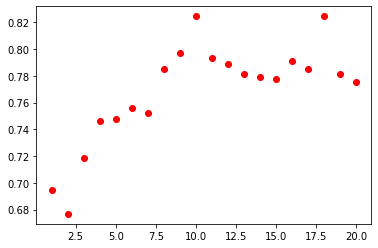

In [68]:
# The best score from Part 2 was observed with depth = 2
# Using random forest classifier
clforest = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=1)
clforest.fit(X, is_greater)
cross_single_score = cross_val_score(cltree, X, is_greater, cv=10)
cross_single_score_average = average(cross_single_score)
print('Single tree score from Part B with 1 estimator: %f' % (cross_single_score_average))

# Vary estimators from 1 - 20 and plot cross-validated accuracy using 10-fold cross accuracy
for estimators in range(1, 21):
    clforest = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=estimators)
    clforest.fit(X, is_greater)
    forest_cross_scores = cross_val_score(clforest, X, is_greater, cv=10)
    forest_cross_scores_average = average(forest_cross_scores)
    print('Number of extimators %d   Average of cross-validation scores = %f' 
          % (estimators, forest_cross_scores_average))
    plt.plot(estimators, forest_cross_scores_average.item(), 'ro', scalex=True, scaley=True)

plt.show()

**Question: Do you see an improvement using random forests versus using a
single tree (Note: set n estimators = 1 to see the result for a single tree instead of using
the result in (b))**

*I see the results using a random forest vary between less accurate to more accurate than using a single tree depending on the number of estimators used, therefore I cannot make any conclusive affimation regarding any improvement from using a random forest. The number of estimators used also does not seem to have neither a direct or inverse effect on the scores.*

(d) Using the method for building a decision tree you
          used in part (b), build a tree but randomly hold out a
          $.2$,$.4$,$.6$, and $.8$ fraction of the data set (so you
          will need to build 4 different trees for each depth value).  Report the test
          error (the error on the held-out set) for each decision
          tree.  Plot the error.

held out fraction 0.2   final_score = 0.703636    error = 0.296364
held out fraction 0.4   final_score = 0.764286    error = 0.235714
held out fraction 0.6   final_score = 0.809892    error = 0.190108
held out fraction 0.8   final_score = 0.812805    error = 0.187195


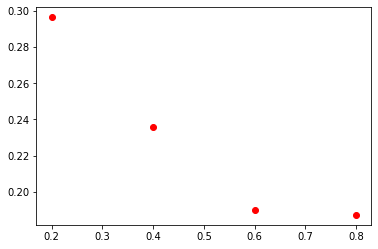

In [70]:
# For validation with hold-out
held_out_fractions = [0.2, 0.4, 0.6, 0.8]
for held_out in held_out_fractions:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=held_out, random_state=0)
    is_greater_train = Y_train.apply(lambda val: val > M)
    is_greater_test = Y_test.apply(lambda val: val > M)

    cltree = tree.DecisionTreeClassifier(criterion="gini", max_depth=10)
    cltree = cltree.fit(X_train, is_greater_train)
    cross_holdout_scores = cross_val_score(cltree, X_test, is_greater_test, cv=10)
    average_cross_holdout_scores = average(cross_holdout_scores)
    error = 1 - average_cross_holdout_scores
    print('held out fraction %.1f   final_score = %f    error = %f' % (held_out, average_cross_holdout_scores, error))
    plt.plot(held_out, error, 'ro', scalex=True, scaley=True)

plt.show()